# Análisis Simulaciones MadGraph/Pythia8/Delphes
Los outputs están en *sim_outputs/*.

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
hep.style.use("CMS")

In [2]:
# number of jets to take into account
n_jets = 4
# number of leptons to take into account
n_lep = 0

## Simulación con $g_{Sg} = 1.0$ únicamente
Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [3]:
rootFile = "./sim_outputs/Events_gSg.root"
tree_gSg = dm.Converter(rootFile)
tree_gSg.generate(jet_elements=n_jets, e_mu_elements=n_lep)
data_gSg = tree_gSg.df

In [4]:
data_gSg

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,111.529335,99.050034,83.382568,46.678516,2.929717,0.695425,-0.638978,-0.085567,-2.162518,0.883978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.248558,-2.045599
1,140.390411,94.552071,91.214249,70.071587,2.929699,1.374208,0.685025,0.585826,3.036837,-0.852870,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.251215,1.869659
2,106.389511,74.772141,63.282013,43.151485,1.232230,1.146798,0.343475,-0.326414,-1.802993,2.010970,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.662182,1.806841
3,72.864563,32.703781,31.683580,17.026184,-1.561173,-0.778997,0.885172,0.777252,3.065858,0.624996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.223954,-1.094490
4,127.528336,110.097717,104.991547,53.916405,1.926089,-0.530145,-0.276456,1.916881,-0.882786,2.030137,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.067589,2.614288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,100.159416,49.080193,44.946342,38.608715,0.506898,0.908222,-3.427352,-4.170271,2.943337,0.176395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.538646,-1.677431
49996,35.510445,27.300705,26.805979,22.454071,-2.139915,-0.599597,-0.645992,-1.298605,2.624336,1.203405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.831616,0.392800
49997,56.332050,43.382637,20.161825,19.924070,-1.401973,-1.120762,-1.924027,-2.797692,2.519030,-0.940488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.551254,1.840600
49998,42.224472,25.382967,24.367290,7.678998,1.374417,0.011803,3.776555,2.440901,-2.170304,-0.005893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.675263,0.131714


In [49]:
def PlotCinematicVariable(data, variable, suptitle, njets=4):
    fig, ax = plt.subplots(2,2)

    axs = {
        0: ax[0,0],
        1: ax[0,1],
        2: ax[1,0],
        3: ax[1,1],
    }

    for i in range(njets):
        rango = np.linspace(data[f'jet_{variable}{i}'].min(), data[f'jet_{variable}{i}'].max())
        axs[i].hist(data[f'jet_{variable}{i}'], bins = rango, density = True)
        axs[i].set_title(f'Jet {i}',fontsize=15)
        axs[i].grid()
        axs[i].tick_params(axis='x',labelsize=12)
        axs[i].tick_params(axis='y',labelsize=12)

    plt.suptitle(suptitle, fontsize=30)

    plt.show()

def PlotMissingETVariable(data):
    fig, ax = plt.subplots(2)

    rango = np.linspace(data['missinget_met'].min(), data['missinget_met'].max())
    ax[0].hist(data['missinget_met'], bins = rango, density=True)
    ax[0].set_title(r'$\left|E_{T}^{miss}\right|$', fontsize=15)
    ax[0].grid()
    ax[0].tick_params(axis='x',labelsize=12)
    ax[0].tick_params(axis='y',labelsize=12)

    rango = np.linspace(data['missinget_phi'].min(), data['missinget_phi'].max())
    ax[1].hist(data['missinget_phi'], bins = rango, density=True)
    ax[1].set_title(r'$\phi_{E_{T}^{miss}}$', fontsize=15)
    ax[1].grid()
    ax[1].tick_params(axis='x',labelsize=12)
    ax[1].tick_params(axis='y',labelsize=12)

    plt.show()

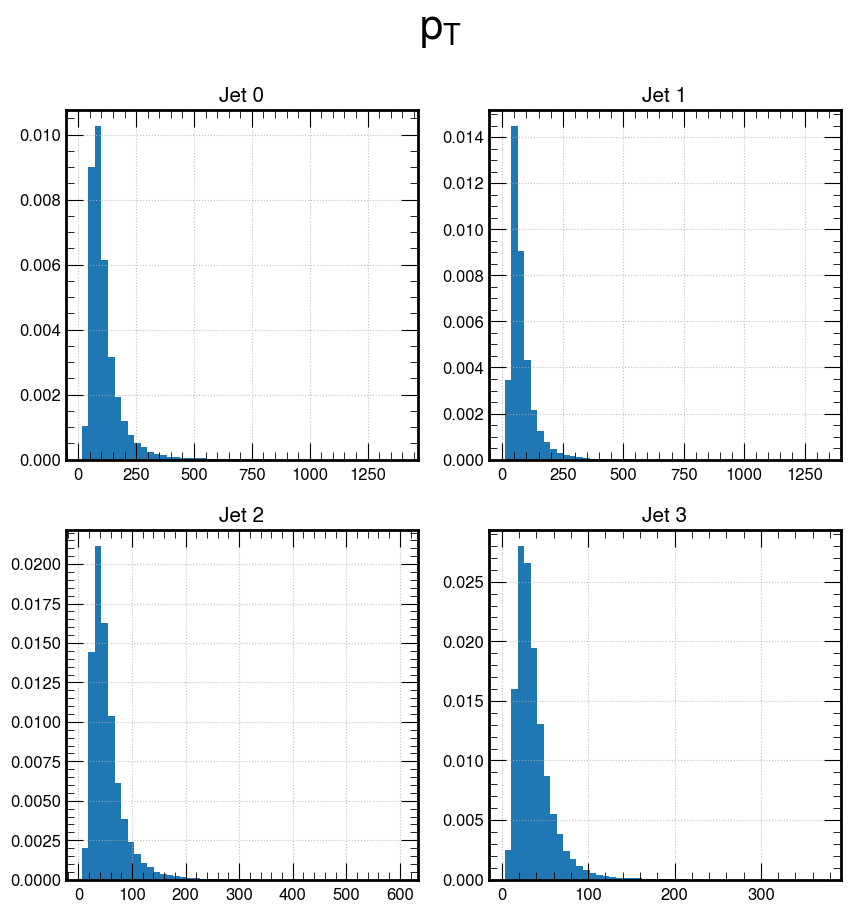

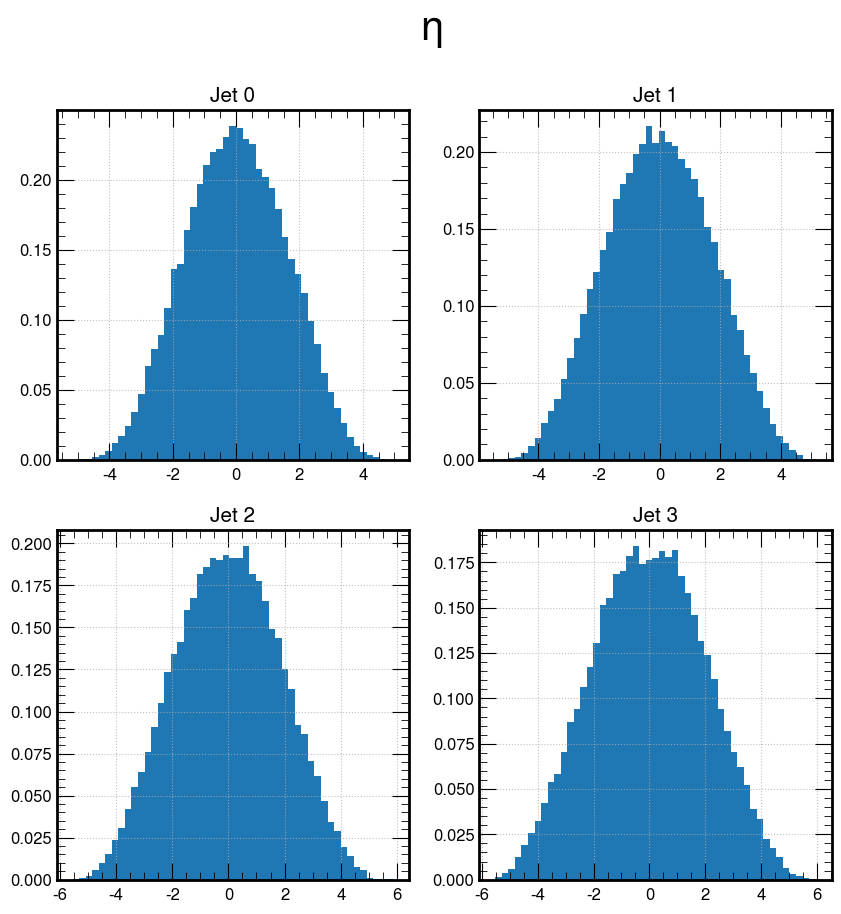

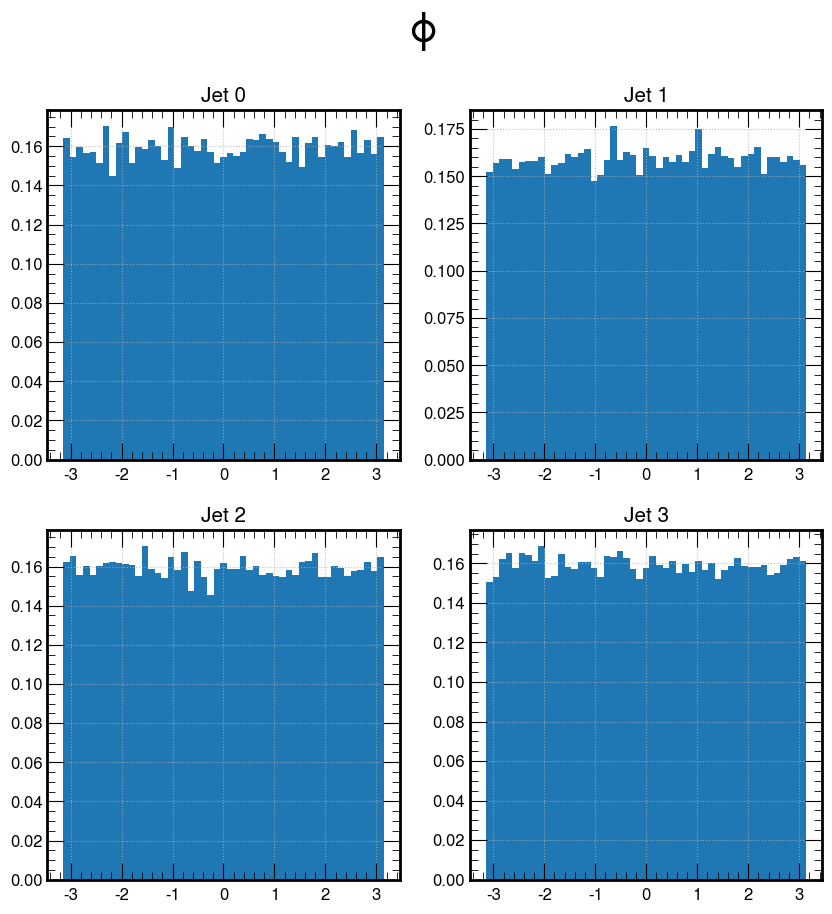

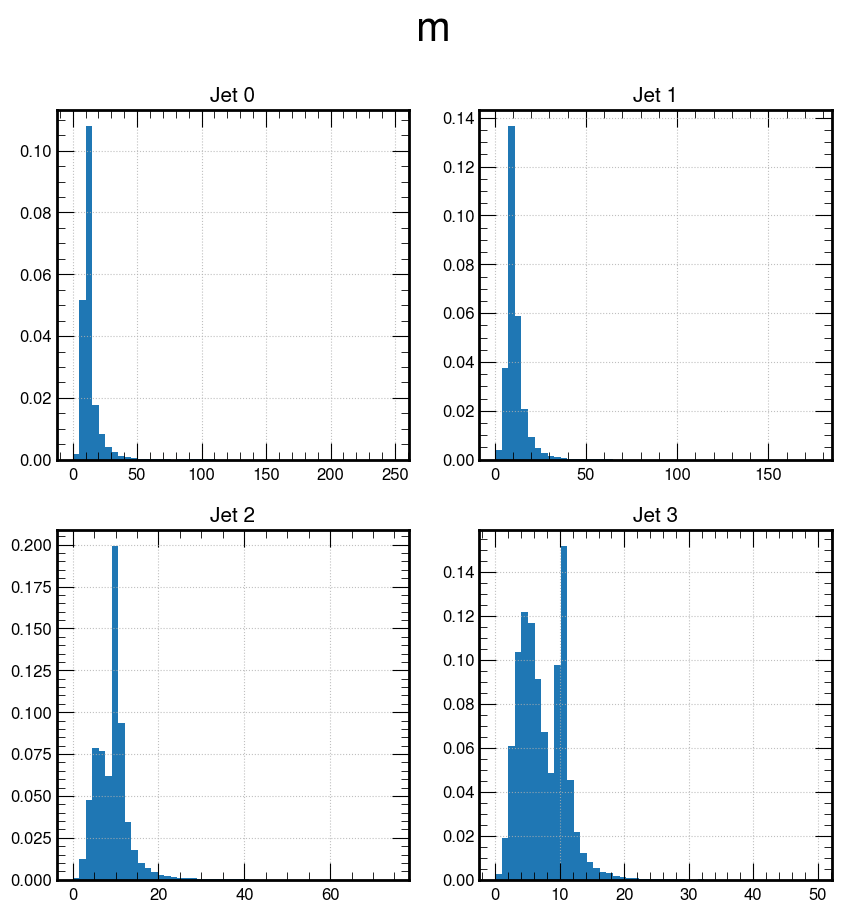

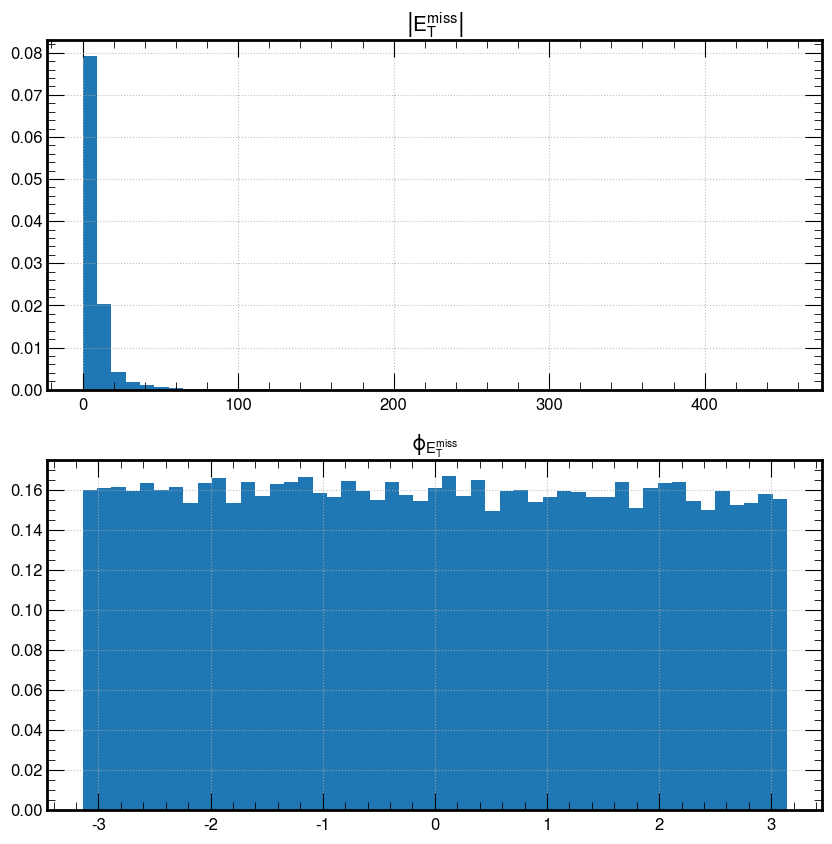

In [50]:
# pt
PlotCinematicVariable(data_gSg, 'pt', r'$p_{T}$')
# eta
PlotCinematicVariable(data_gSg, 'eta', r'$\eta$')
# phi
PlotCinematicVariable(data_gSg, 'phi', r'$\phi$')
# mass
PlotCinematicVariable(data_gSg, 'mass', r'$m$')
# missinget
PlotMissingETVariable(data_gSg)

## Simulación con $g_{Sq} = 1.0$ únicamente
$q = u,d,c,s,b,t$

Masas: $m_{\chi} = 10$ GeV, $m_{Y_{0}} = 100$ GeV

In [38]:
rootFile = "./sim_outputs/Events_gSq.root"
tree_gSq = dm.Converter(rootFile)
tree_gSq.generate(jet_elements=n_jets, e_mu_elements=n_lep)
data_gSq = tree_gSq.df

In [39]:
data_gSq

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_btag0,jet_btag1,jet_btag2,jet_btag3,jet_tautag0,jet_tautag1,jet_tautag2,jet_tautag3,missinget_met,missinget_phi
0,49.455811,47.112556,36.889336,36.251766,1.462520,1.415158,3.037157,2.396303,-0.293455,-1.665111,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.399382,-0.808065
1,60.123653,39.595478,35.830624,35.243595,-1.659876,-2.468529,0.526745,-0.411150,-0.631630,1.053265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.927184,-2.473915
2,82.950424,69.275650,51.152363,39.653214,3.470770,1.280096,0.801925,2.563746,-0.849711,0.852125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.055139,-2.659859
3,75.918007,49.102303,44.579681,43.905174,3.203555,-3.620462,-3.176054,3.226860,-0.655951,1.940098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.209476,2.371904
4,72.304428,66.581955,57.963673,52.959190,-1.246617,-0.189392,-2.867421,-0.330293,-3.046180,0.580599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.962089,2.607137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,88.855774,56.447037,30.564453,28.649204,-2.439445,-4.193920,-1.696152,-1.346797,0.041960,3.092666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.500796,0.748441
49996,64.497108,52.877453,29.675692,18.911673,0.978035,0.352677,2.458020,-3.142323,-2.653556,0.942351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.573687,-1.746363
49997,92.104424,55.775894,48.122402,37.794643,-0.825853,0.359093,0.858895,1.087460,-0.809770,-1.449208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.590353,1.939533
49998,85.700813,41.262959,31.921484,30.624744,-1.145973,-3.072583,-0.820894,-2.612267,-2.170596,0.617602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.549011,1.426650


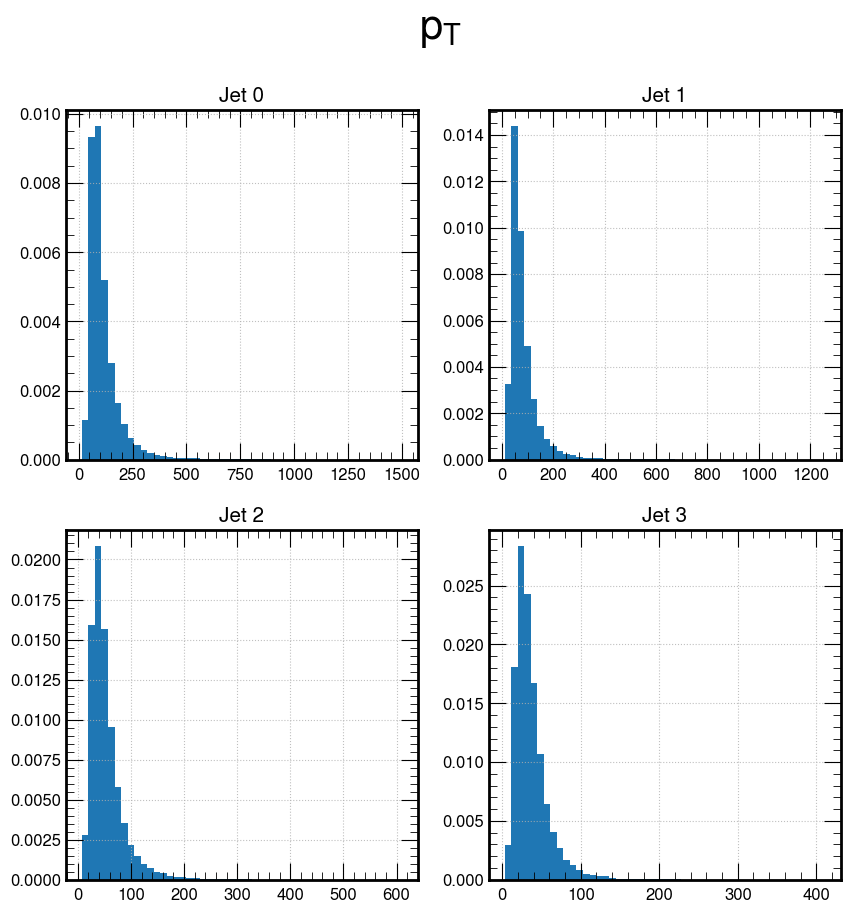

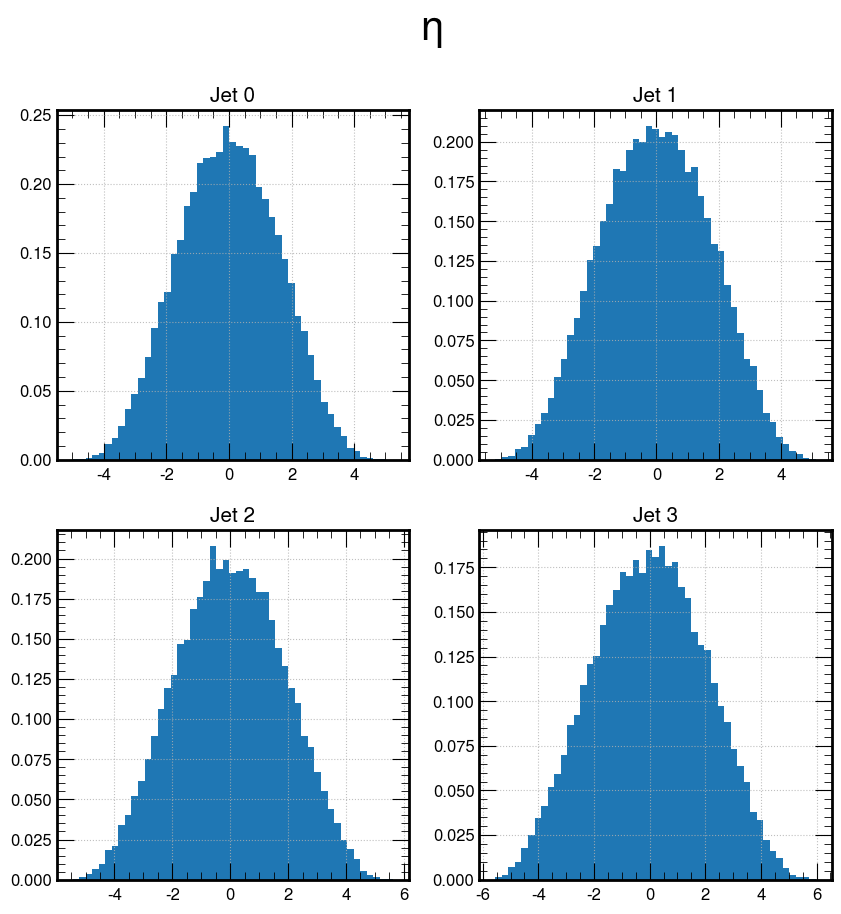

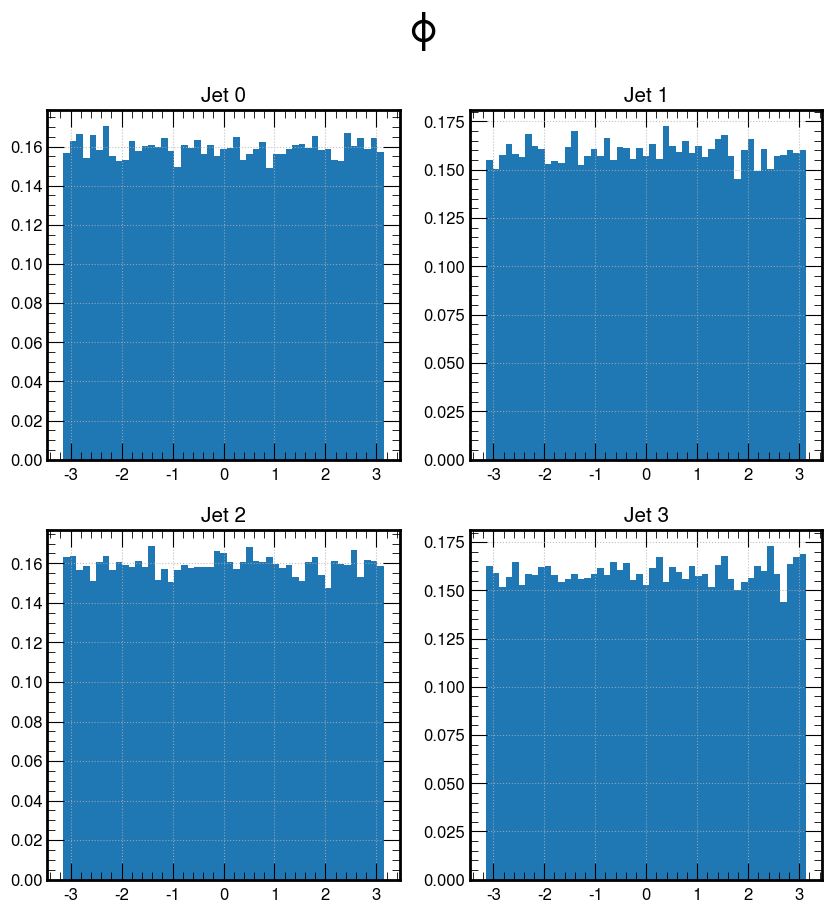

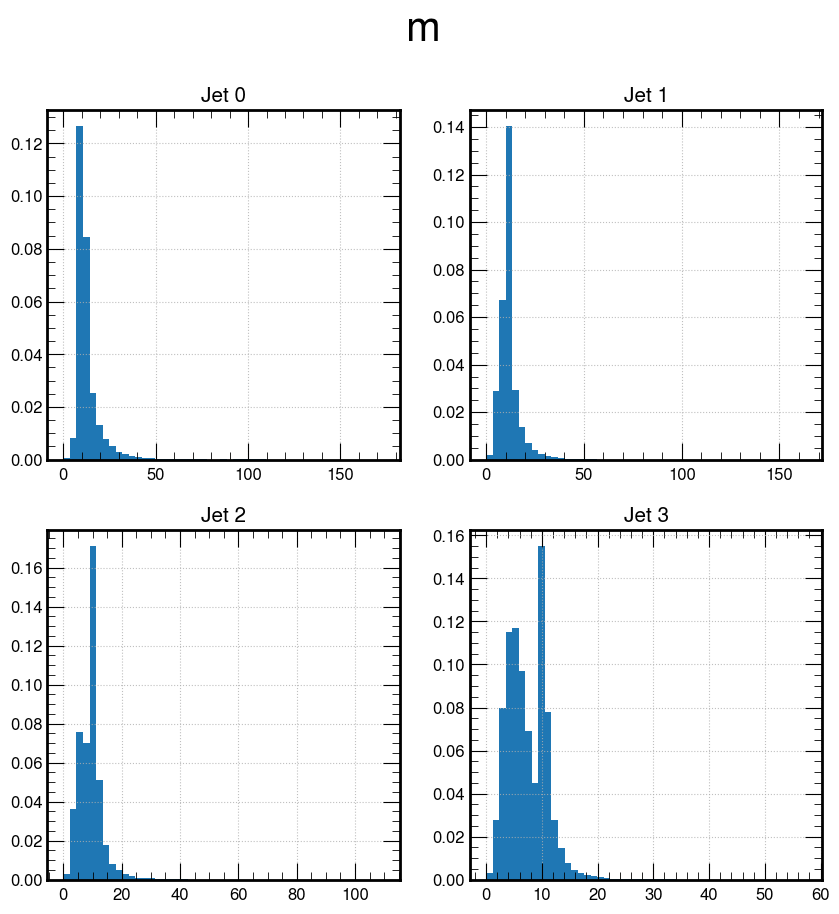

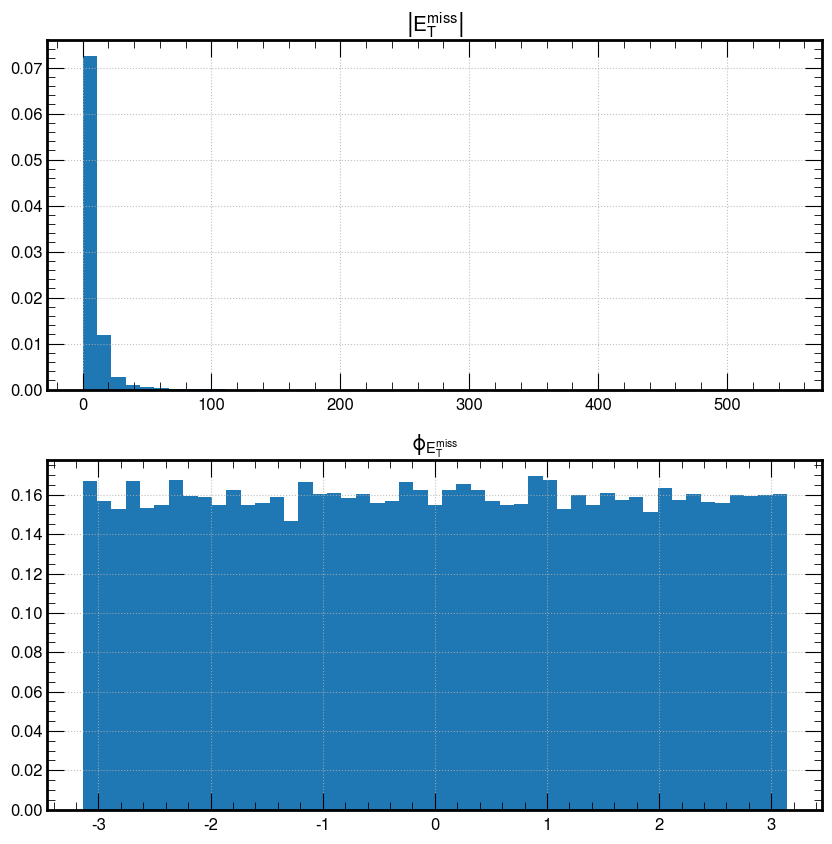

In [51]:
# pt
PlotCinematicVariable(data_gSq, 'pt', r'$p_{T}$')
# eta
PlotCinematicVariable(data_gSq, 'eta', r'$\eta$')
# phi
PlotCinematicVariable(data_gSq, 'phi', r'$\phi$')
# mass
PlotCinematicVariable(data_gSq, 'mass', r'$m$')
# missinget
PlotMissingETVariable(data_gSq)